## Appendix

Code accompanying the Appendix for [Eye On Semantics](https://osf.io/wyp7a/).\
The provo corpus can be downloaded from this [repository](https://osf.io/sjefs/).\
Preprocessing of the data used in this analysis can be found on the [Github EOS repository](https://github.com/magna-fede/EOS).

Import relevanta packages.

In [124]:
library(readxl)
library(lme4)
library(lmerTest)
library(lattice)
require(ggeffects)
library(ggplot2)
require(easystats)
library("dplyr")

Exclude NA values and words that were not fixated.

In [125]:
subset_provo <- read.csv("U:/Downloads/provo_normalised_pred.csv")
subset_provo <- na.omit(subset_provo)
subset_provo <- subset_provo[subset_provo$IA_FIRST_FIXATION_DURATION != 0, ]

Rename the variables for easy life when exporting the tables.

In [126]:
data <- subset_provo %>% 
     rename("Item_ID" = "Word_Unique_ID",
            "Length" = "Word_Length",
            "Position" = "Word_Number",
            "Cloze" = "OrthographicMatch",
            "Predictability" = "Predictabilty",
            "Category" = "Word_POS",
            "FFD" = "IA_FIRST_FIXATION_DURATION",
            "GD" = "IA_FIRST_RUN_DWELL_TIME",
            "Concreteness" = "Conc.M")

# FFD

In [127]:
ffd <- lmer(FFD ~ Zipf.value + Length + Position + Cloze*Concreteness*Category +
                + (1|Participant_ID) + (1|Item_ID), data = data,
            control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

Export FFD results.

In [128]:
sjPlot::tab_model(ffd)

In [129]:
model_a <- lmer(FFD ~ Zipf.value + Length + Position + Cloze*Concreteness*Category +
                + (1|Participant_ID) + (1|Item_ID), data = data, REML = FALSE)

In [130]:
model_b <- lmer(FFD ~ Zipf.value + Length + Position + Cloze*Category +
                + (1|Participant_ID) + (1|Item_ID), data = data, REML = FALSE)

In [131]:
anova(model_a, model_b, test="LRT" )

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
model_b,14,653958.0,654083.1,-326965.0,653930.0,NA,NA,NA
model_a,22,653956.6,654153.3,-326956.3,653912.6,17.32809,8,0.02686834


The above test suggests that Concreteness should be included in the full model.

### Plots

In [132]:
dfConcSim <- ggpredict(ffd, terms = c("Cloze", "Concreteness", "Category"))

In [133]:
ffd_cloze <- plot(dfConcSim, limits = c(110, 250)) +
    scale_color_discrete(labels=c("Abstract", "Mean", "Concrete")) +
    scale_fill_discrete(labels=c("Abstract", "Mean", "Concrete")) 


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

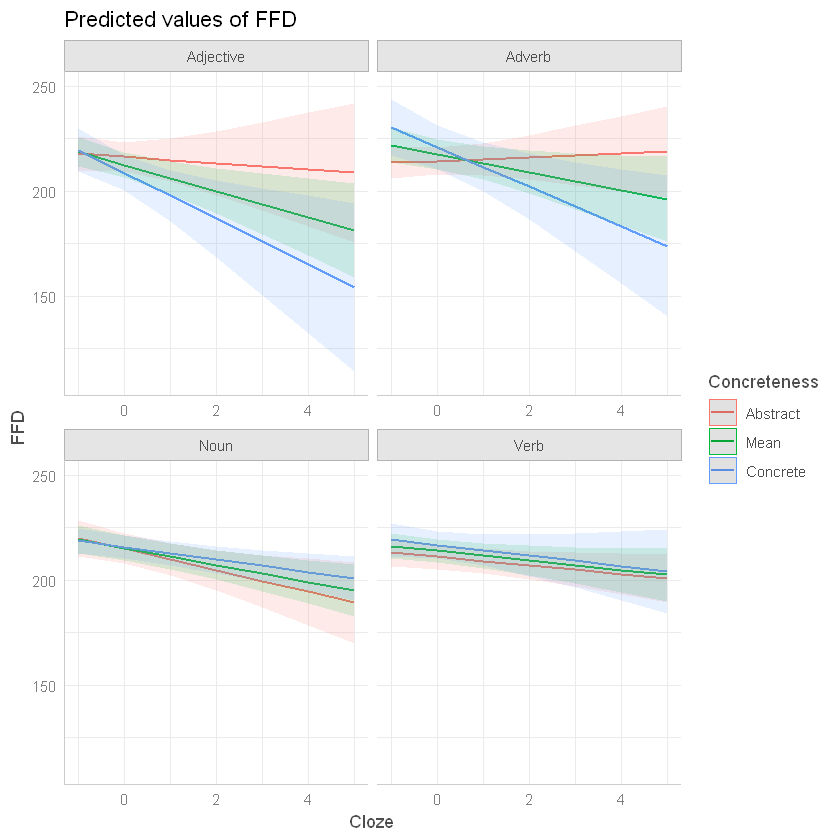

In [134]:
ffd_cloze

In [135]:
ggsave(filename = "provo_ffd_clozeconc.png",
    path = "U:/AnEyeOnSemantics/Paper",
       plot = ffd_cloze,
       device='png',
       dpi=700)

Saving 6.67 x 6.67 in image

In [136]:
dfFreqSim <- ggpredict(ffd, terms = c("Cloze", "Zipf.value", "Category"))

In [137]:
ffd_clozefreq <- plot(dfFreqSim, limits = c(110, 250)) +
 scale_color_discrete(labels=c("Low Frequency", "Mean", "High Frequency"))  +
    scale_fill_discrete(labels=c("Low Frequency", "Mean", "High Frequency")) 


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

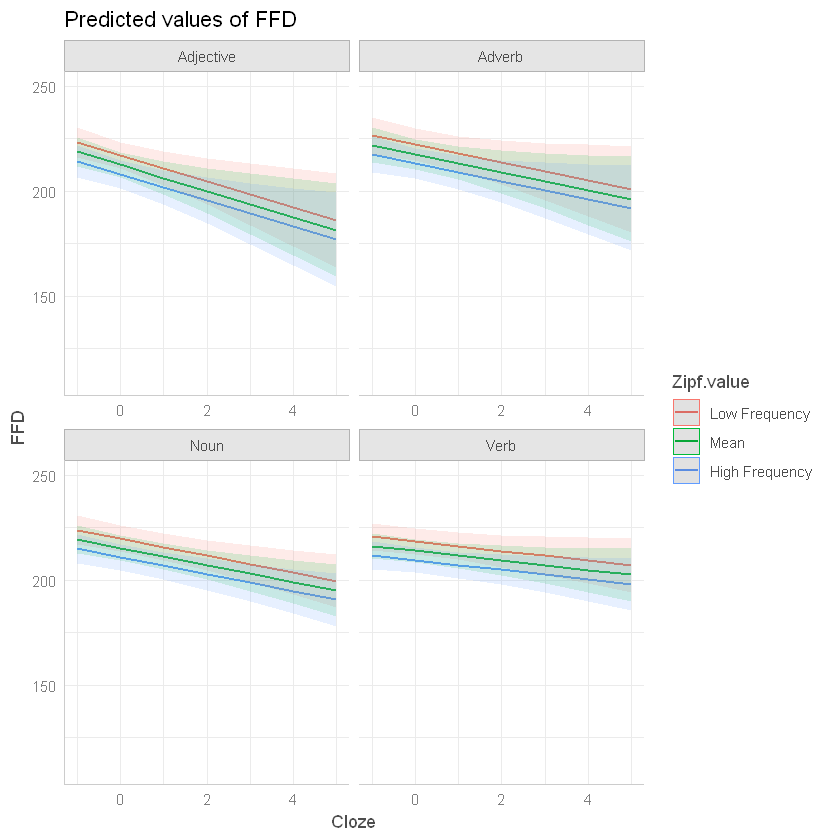

In [138]:
ffd_clozefreq

In [139]:
ggsave(filename = "provo_ffd_clozefreq.png",
    path = "U:/AnEyeOnSemantics/Paper",
       plot = ffd_clozefreq,
       device='png',
       dpi=700)

Saving 6.67 x 6.67 in image

# GD

In [140]:
gd <- lmer(GD ~ Zipf.value + Length + Position + Cloze*Concreteness*Category +
                + (1|Participant_ID) + (1|Item_ID), data = data,
            control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [141]:
sjPlot::tab_model(gd)

In [142]:
model_a <- lmer(GD ~ Zipf.value + Length + Position + Cloze*Concreteness*Category +
                + (1|Participant_ID) + (1|Item_ID), data = data, REML = FALSE)

In [143]:
model_b <- lmer(GD ~ Zipf.value + Length + Position + Cloze*Category +
                + (1|Participant_ID) + (1|Item_ID), data = data, REML = FALSE)

In [144]:
anova(model_a, model_b, test="LRT" )

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
model_b,14,708943.0,709068.2,-354457.5,708915.0,NA,NA,NA
model_a,22,708950.2,709146.9,-354453.1,708906.2,8.734504,8,0.3651856


The above test suggests that we don't have evidence in support of including Concreteness in the full model.

### Plots

In [145]:
dfConcSim <- ggpredict(gd, terms = c("Cloze", "Concreteness", "Category"))

gd_cloze <- plot(dfConcSim, limits = c(90, 320)) +
    scale_color_discrete(labels=c("Abstract", "Mean", "Concrete")) +
    scale_fill_discrete(labels=c("Abstract", "Mean", "Concrete")) 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

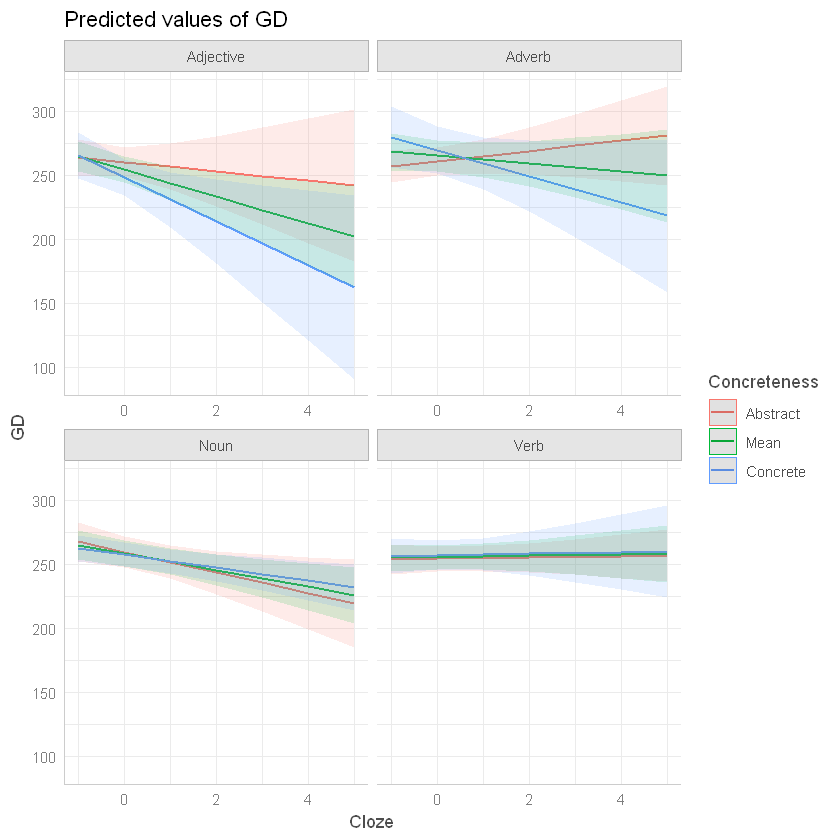

In [146]:
gd_cloze

In [147]:
ggsave(filename = "provo_gd_clozeconc.png",
    path = "U:/AnEyeOnSemantics/Paper",
       plot = gd_cloze,
       device='png',
       dpi=700)

Saving 6.67 x 6.67 in image

In [148]:
dfFreqSim <- ggpredict(gd, terms = c("Cloze", "Zipf.value", "Category"))

In [149]:
gd_clozefreq <- plot(dfFreqSim, limits = c(90, 320)) +
 scale_color_discrete(labels=c("Low Frequency", "Mean", "High Frequency"))  +
    scale_fill_discrete(labels=c("Low Frequency", "Mean", "High Frequency")) 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

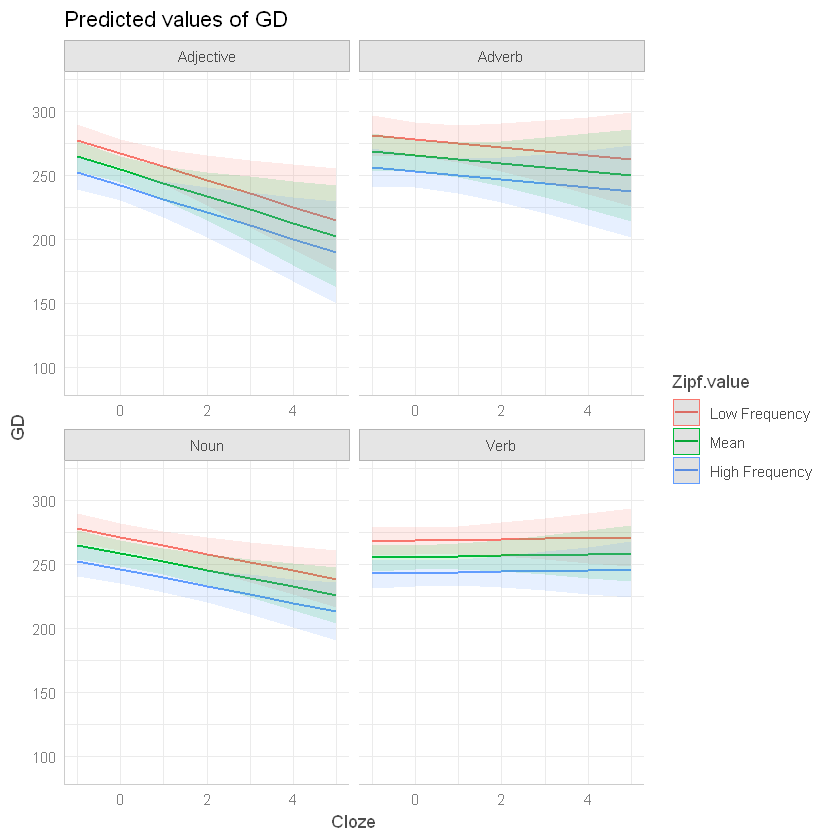

In [150]:
gd_clozefreq

In [151]:
ggsave(filename = "provo_gd_clozefreq.png",
    path = "U:/AnEyeOnSemantics/Paper",
       plot = gd_clozefreq,
       device='png',
       dpi=700)

Saving 6.67 x 6.67 in image

# FFD Predictability

In [152]:
ffd_pred <- lmer(FFD ~ Zipf.value + Length + Position + Predictability*Concreteness*Category +
                + (1|Participant_ID) + (1|Item_ID), data = data,
            control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [153]:
sjPlot::tab_model(ffd_pred)

### Plots

In [154]:
dfConcSim <- ggpredict(ffd_pred, terms = c("Predictability", "Concreteness", "Category"))

ffd_predconc <- plot(dfConcSim, limits = c(120, 270)) +
    scale_color_discrete(labels=c("Abstract", "Mean", "Concrete")) +
    scale_fill_discrete(labels=c("Abstract", "Mean", "Concrete")) 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

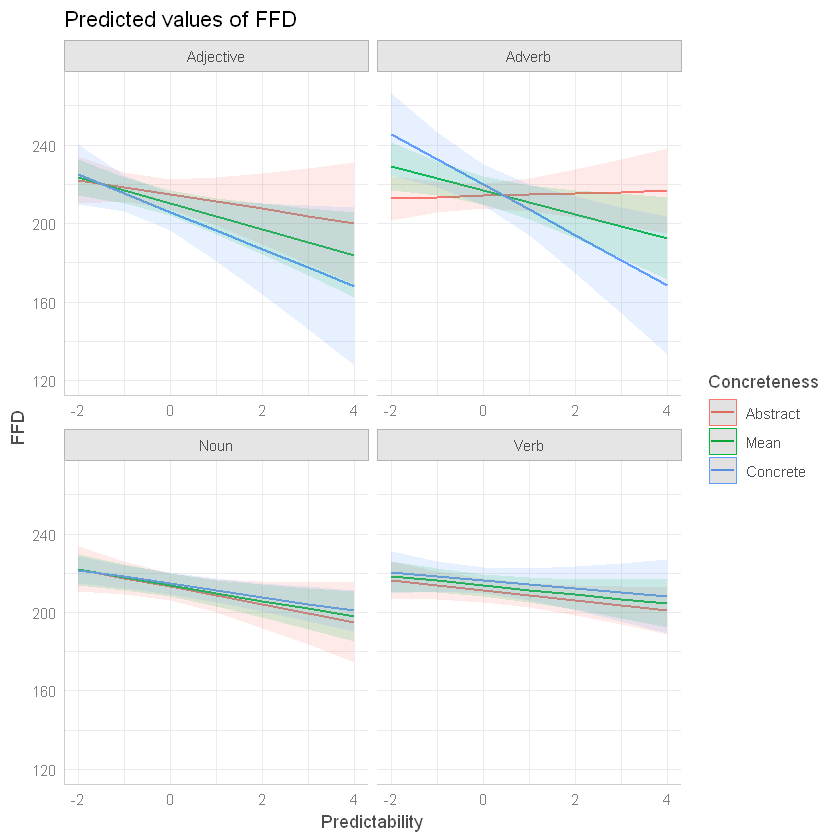

In [155]:
ffd_predconc

In [156]:
ggsave(filename = "provo_ffd_predconc.png",
    path = "U:/AnEyeOnSemantics/Paper",
       plot = ffd_predconc,
       device='png',
       dpi=700)

Saving 6.67 x 6.67 in image

In [157]:
dfFreqSim <- ggpredict(ffd_pred, terms = c("Predictability", "Zipf.value", "Category"))

ffd_predfreq <- plot(dfFreqSim, limits = c(120, 270)) +
 scale_color_discrete(labels=c("Low Frequency", "Mean", "High Frequency"))  +
    scale_fill_discrete(labels=c("Low Frequency", "Mean", "High Frequency")) 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

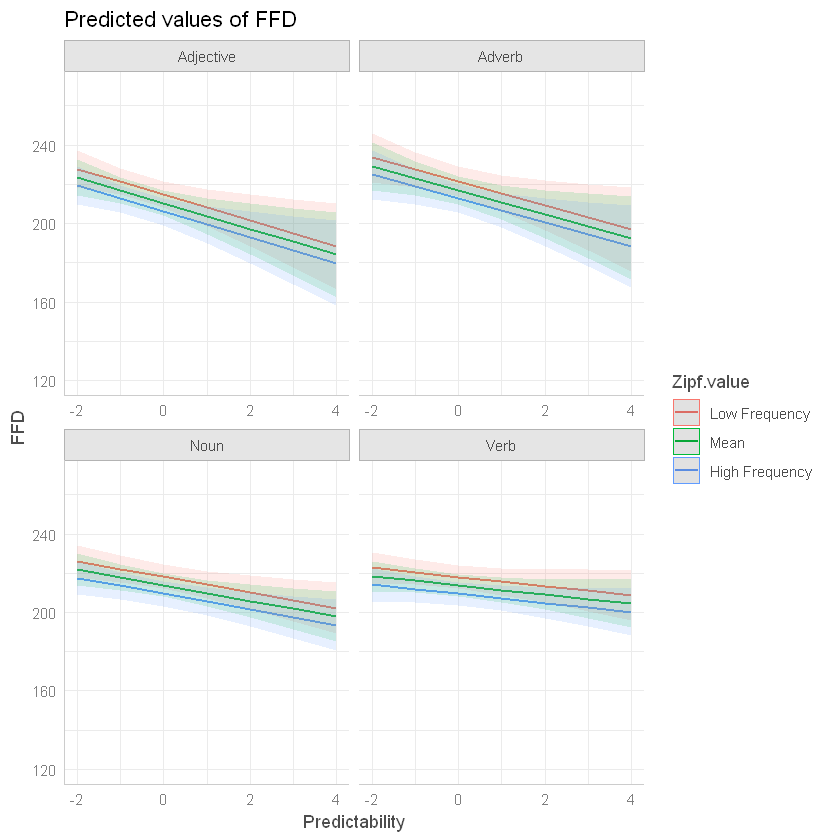

In [158]:
ffd_predfreq

In [159]:
ggsave(filename = "provo_ffd_predfreq.png",
    path = "U:/AnEyeOnSemantics/Paper",
       plot = ffd_predfreq,
       device='png',
       dpi=700)

Saving 6.67 x 6.67 in image

# GD Predictability

In [160]:
gd_pred <- lmer(GD ~ Zipf.value + Length + Position + Predictability*Concreteness*Category +
                + (1|Participant_ID) + (1|Item_ID), data = data,
            control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=50000)))

In [161]:
sjPlot::tab_model(gd_pred)

In [162]:
dfConcSim <- ggpredict(gd_pred, terms = c("Predictability", "Concreteness", "Category"))

In [163]:
gd_predconc <- plot(dfConcSim, limits = c(110, 335)) +
    scale_color_discrete(labels=c("Abstract", "Mean", "Concrete")) +
    scale_fill_discrete(labels=c("Abstract", "Mean", "Concrete")) 


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

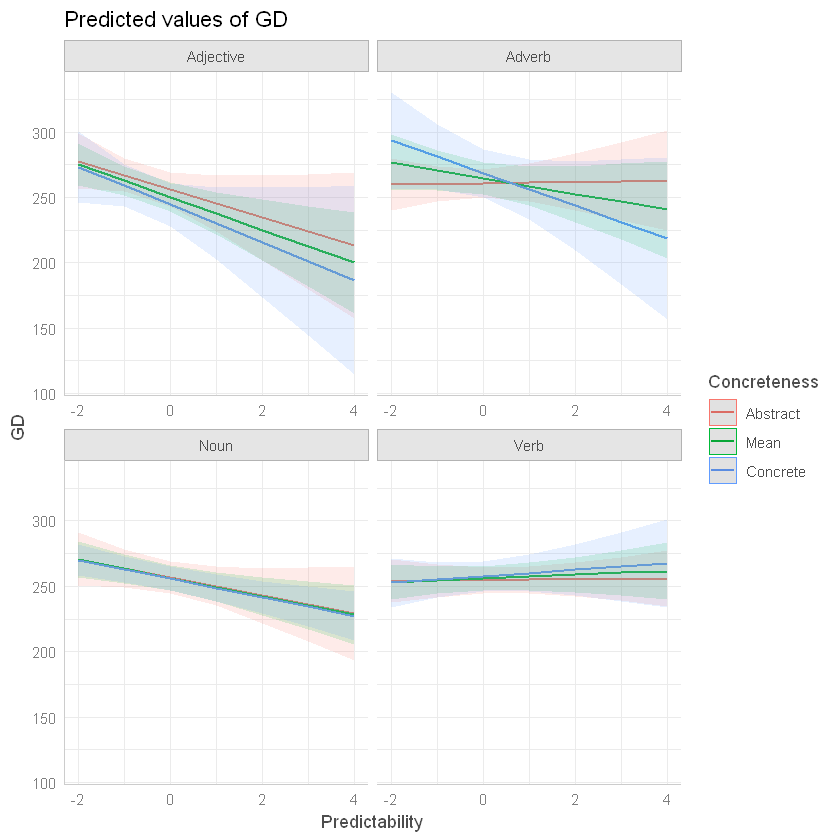

In [164]:
gd_predconc

In [165]:
ggsave(filename = "provo_gd_predconc.png",
    path = "U:/AnEyeOnSemantics/Paper",
       plot = gd_predconc,
       device='png',
       dpi=700)

Saving 6.67 x 6.67 in image

In [166]:
dfFreqSim <- ggpredict(gd_pred, terms = c("Predictability", "Zipf.value", "Category"))
gd_predfreq <- plot(dfFreqSim, limits = c(110, 335)) +
    scale_color_discrete(labels=c("Low Frequency", "Mean", "High Frequency"))  +
    scale_fill_discrete(labels=c("Low Frequency", "Mean", "High Frequency")) 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.

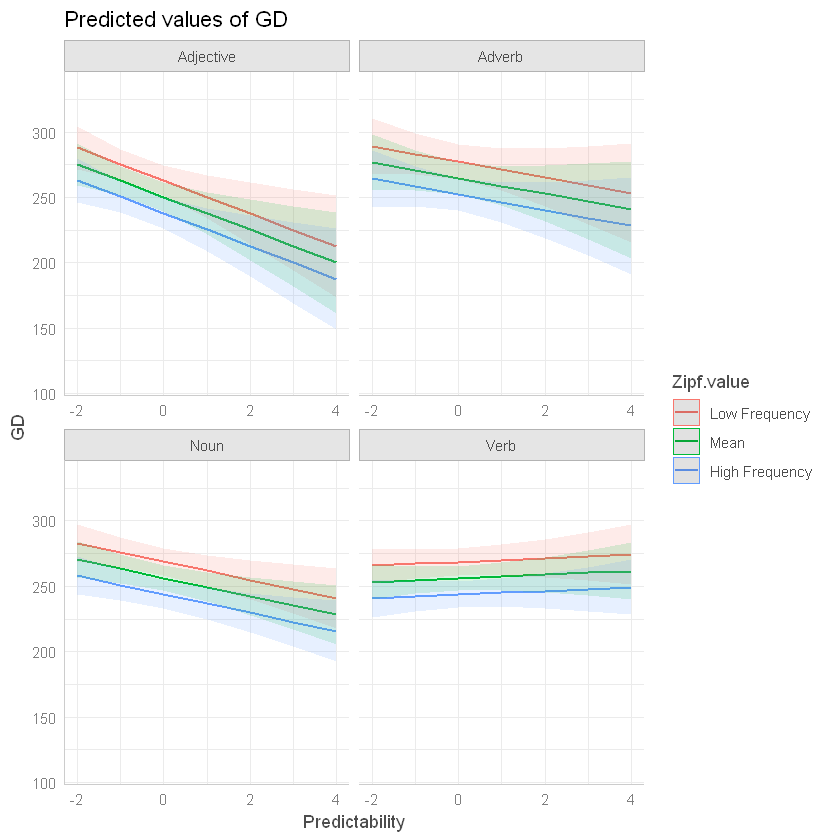

In [167]:
gd_predfreq

In [168]:
ggsave(filename = "provo_gd_predfreq.png",
    path = "U:/AnEyeOnSemantics/Paper",
       plot = gd_predfreq,
       device='png',
       dpi=700)

Saving 6.67 x 6.67 in image